# Implementing Feedforward Neural Networks

**Dataset:** CIFAR-10 Dataset **[Loading using TensorFlow]**

Build Feedforward neural networks with Keras and TensorFlow for classification of CIFAR-10 image dataset using the following steps:
1. Import the necessary packages
2. Load the training and testing data
3. Define the network architecture using Keras
4. Train the model using SGD/Adam optimizer
5. Evaluate the network
6. Plot the training loss and accuracy

### 1. Import Necessary Packages

Import the necessary libraries for building and training the model:
- **NumPy** for numerical operations.
- **Matplotlib** for plotting the training curves.
- **Keras** for creating and training the neural network model.
- **LabelBinarizer** from sklearn for encoding labels into a one-hot format.

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD, Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report

### 2. Load the Training and Testing Data

Load and preprocess the CIFAR-10 dataset:
- **Loading the Data:** We use `cifar10.load_data()` to load the training and testing sets.
- **Normalization:** The pixel values, originally between 0 and 255, are normalized to a range of [0, 1].
- **Reshaping the Data:** The images are flattened from their original shape of 32x32x3 into a 1D vector of 3072 values (32 * 32 * 3), which is suitable for input to a fully connected network.
- **One-Hot Encoding:** The labels are transformed into a one-hot encoded format using `LabelBinarizer`.

In [2]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Flatten the labels from (None, 1) to (None,) so that it's integer-encoded
y_train = y_train.flatten()
y_test = y_test.flatten()

# Normalize pixel values to be between 0 and 1
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Reshape the images (no need to change the shape as it's already (32, 32, 3))

### 3. Define the Network Architecture

Define a simple feedforward neural network using Keras:
1. **Flatten Layer:** This layer converts each 32x32x3 image into a one-dimensional vector of 3072 values.
2. **Dense Hidden Layers:** Two fully connected layers with 512 and 256 neurons respectively, using ReLU activation to introduce non-linearity.
3. **Output Dense Layer:** The output layer contains 10 neurons (one for each CIFAR-10 class), activated by softmax for multi-class classification.

In [3]:
# Define the model architecture
model = Sequential([
    Flatten(input_shape=(32, 32, 3)),  # Flatten the input image to a 1D vector of size 3072
    Dense(128, activation="relu"),
    Dense(64, activation="relu"),
    Dense(10, activation="softmax")  # Output layer with 10 classes (0-9)
])

c:\Users\rudra\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### 4. Compile and Train the Model

Compile the model, specifying:
- **Optimizer:** We use either Stochastic Gradient Descent (SGD) or the Adam optimizer, depending on the choice. Adam is often preferred for its adaptive learning rate, but SGD can also be effective.
- **Loss Function:** Sparse categorical cross-entropy is used, as we have multiple classes for classification.
- **Metrics:** We track accuracy to monitor performance during training.

We then train the model for 11 epochs, using the training data and validating on the test data.

In [4]:
# Compile the model with chosen optimizer and sparse categorical cross-entropy loss
optimizer = SGD()  # You can change this to Adam() for using the Adam optimizer

# Compile the model with Adam optimizer
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


# Compile the model
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=11, validation_data=(x_test, y_test))

Epoch 1/11
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.2604 - loss: 2.0365 - val_accuracy: 0.3671 - val_loss: 1.7865
Epoch 2/11
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.3751 - loss: 1.7582 - val_accuracy: 0.3969 - val_loss: 1.7064
Epoch 3/11
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4124 - loss: 1.6606 - val_accuracy: 0.4168 - val_loss: 1.6595
Epoch 4/11
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4325 - loss: 1.5977 - val_accuracy: 0.4199 - val_loss: 1.6249
Epoch 5/11
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4519 - loss: 1.5548 - val_accuracy: 0.4484 - val_loss: 1.5758
Epoch 6/11
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4637 - loss: 1.5260 - val_accuracy: 0.4264 - val_loss: 1.6158
Epoch 7/11
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4773 - loss: 1.4841 - val_accuracy: 0.4533 - val_loss: 1.5413
Epoch 8/11
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4837 - loss: 1.4599 - 

### 5. Evaluate the Model

Evaluate the performance of the model after training, on the test dataset. Print out the test accuracy to assess how well the model generalizes to unseen data.

In [5]:
# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_accuracy*100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4846 - loss: 1.4453
Test accuracy: 48.67%


#### Make Predictions and Generate a Classification Report

Generate predictions for the test set and display a classification report, which provides precision, recall, F1-score, and support for each class, offering insights into the model's performance.

In [6]:
# Make predictions on the test data
y_pred = model.predict(x_test)

# Convert the predictions to the class with the highest probability
y_pred_classes = np.argmax(y_pred, axis=1)

# Generate the classification report
report = classification_report(y_test, y_pred_classes)
print(report)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

           0       0.64      0.49      0.55      1000
           1       0.45      0.77      0.57      1000
           2       0.45      0.25      0.32      1000
           3       0.39      0.20      0.26      1000
           4       0.43      0.45      0.44      1000
           5       0.35      0.47      0.40      1000
           6       0.53      0.57      0.55      1000
           7       0.54      0.57      0.56      1000
           8       0.58      0.63      0.60      1000
           9       0.55      0.46      0.50      1000

    accuracy                           0.49     10000
   macro avg       0.49      0.49      0.48     10000
weighted avg       0.49      0.49      0.48     10000



### 6. Plot Training Loss and Accuracy

Visualize the training process by plotting the loss and accuracy curves over the 11 epochs:
- **Training vs Validation Loss/Accuracy:** We plot the loss and accuracy for both the training set and the validation set to monitor the model’s performance.
 
This helps in understanding the model’s convergence and checking for overfitting or underfitting.

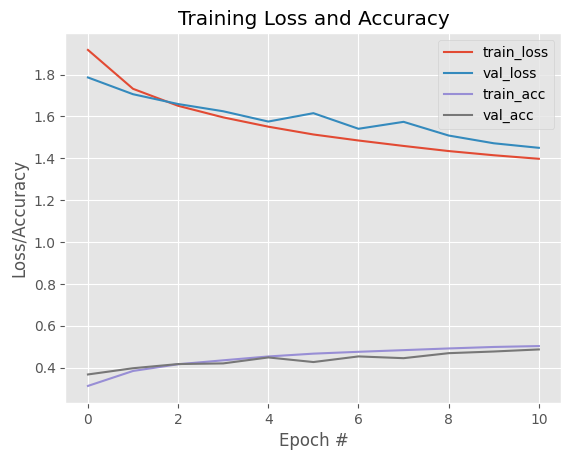

In [7]:
# Plotting the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 11), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, 11), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 11), history.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 11), history.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

#### Visualize Model Prediction on a Single Test Image

Make a prediction on one of the test images from the CIFAR-10 dataset and visualize the result:

1. **Prediction**: We use the trained model to predict the class probabilities for a specific test image.
2. **Image Display**: The selected test image is displayed to provide visual context.
3. **Class Label Output**: We identify and print the predicted class label with the highest probability, mapped to its corresponding class name in CIFAR-10.

This helps in validating the model's predictions visually, ensuring the output matches our expectations.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


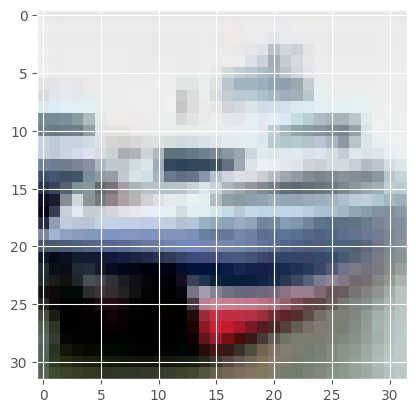

Predicted label: automobile


In [8]:
# Make a prediction on a single test image
predicted_value = model.predict(x_test)

# Visualize the test image
plt.imshow(x_test[1])
plt.show()

# Print the predicted class label for the image
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
print("Predicted label:", class_names[np.argmax(predicted_value[1], axis=0)])